# **Trabajo Final - Agricultura Predictiva**
## **Machine Learning aplicado a la agricultura sostenible:**
## **Clasificación de cultivos orgánicos utilizando modelos de Machine Learning basados en métricas de uso de pesticidas en California**

Realizado por: Elisa Rendón y Maria Camila Álvarez

Universidad EAFIT

Noviembre de 2025


---

#**Planteamiento de la problemática**

El uso de pesticidas en agricultura orgánica genera preocupación por:

*   contaminación del agua,
*   impacto en polinizadores,
*   salud humana,
*   pérdida de biodiversidad.

A pesar de ser orgánicos, muchos campos aún usan pesticidas.

**Pregunta que queremos responder (problema):**

¿Podemos predecir si un campo agrícola aplicará pesticidas, usando información del tipo de cultivo, tamaño del campo y condiciones del entorno?

Esto sirve para:

identificar campos con mayor probabilidad de uso de pesticidas,

*   apoyar políticas públicas,
*   mejorar gestión ambiental,
*   optimizar estrategias de control biológico.

Se quiere analizar si variables como tipo de cultivo, calidad del suelo, tamaño de campo y uso de pesticidas sí permiten predecir si un campo es orgánico.

# **Preparación del entorno**

In [84]:
# importar librerías
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [85]:
#montar google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#**Disponibilidad de datos**

## Dataset:
Analysis Data for "Identifying and characterizing pesticide use on 9,000 fields of organic agriculture"


Dataset público, descargado desde:

https://doi.org/10.25349/D9Q02T

Formato: .csv


*   Cumple con disponibilidad
*   Datos abiertos
*   Metadatos y documentación

In [138]:
df_organic = pd.read_csv('/content/drive/MyDrive/EAFIT - Agricultura Predictiva/TrabajoFinal/Organic_NCOMMS2105896.csv')

# **Exploración de los datos**

Se trabajó con el conjunto de datos **“Identifying and characterizing pesticide use on 9,000 fields of organic agriculture” (Larsen, 2021)**, con un total de **99,533 registros y 73 columnas.**
Estas variables incluyen información sobre uso de pesticidas, calidad del suelo, tamaño de las fincas, códigos de cultivos y clasificaciones taxonómicas. La mayoría de los datos son numéricos (enteros o tipo float), aunque algunas columnas son de tipo object (texto).
Se observó además una proporción significativa de valores nulos, especialmente en las variables relacionadas con el suelo, y un rango temporal comprendido entre los años **2013 y 2019**.

In [139]:
#Obtener shape de los datos (filas,columnas)
print(df_organic.shape)

(99533, 73)


In [140]:
#Lista de los nombres de los campos de una tabla
print(df_organic.columns.tolist())

['year', 'soil_quality', 'soilX_chem', 'soilX_hydro', 'soilX_temp', 'genus', 'family', 'pur_cdfa_org', 'pur_cdfa_kern_org', 'KgPrdFishHa100', 'KgPrdBeesHa100', 'KgPrdAqSpHa100', 'KgPrdDriftHa100', 'KgPrdEPA12Ha100', 'KgPrdEPA34Ha100', 'KgPrdInsectOnlyHa100', 'KgPestAIHa100', 'KgPestPrdHa100', 'KgAIEPA12Ha100', 'KgAIEPA34Ha100', 'KgAIFishHa100', 'KgAIDriftHa100', 'KgAIBeesHa100', 'KgAIInsectOnlyHa100', 'comm_code2', 'lnhectares', 'lnfarmSz', 'lnKgPestAIHa100', 'KgPestAIHa100YG', 'lnKgPestAIHa100YG', 'IHSKgPestAIHa100', 'lnKgPestPrdHa100', 'KgPestPrdHa100YG', 'lnKgPestPrdHa100YG', 'lnKgPrdInsectOnlyHa100', 'KgPrdInsectOnlyHa100YG', 'lnKgPrdInsectOnlyHa100YG', 'lnKgPrdDriftHa100', 'KgPrdDriftHa100YG', 'lnKgPrdDriftHa100YG', 'lnKgPrdFishHa100', 'KgPrdFishHa100YG', 'lnKgPrdFishHa100YG', 'lnKgPrdBeesHa100', 'KgPrdBeesHa100YG', 'lnKgPrdBeesHa100YG', 'lnKgPrdAqSpHa100', 'KgPrdAqSpHa100YG', 'lnKgPrdAqSpHa100YG', 'lnKgPrdEPA12Ha100', 'KgPrdEPA12Ha100YG', 'lnKgPrdEPA12Ha100YG', 'lnKgPrdEPA34Ha100

In [141]:
#Mostrar los primeras n filas(registros) del dataframe(tabla)
print(df_organic.head(5))

   year  soil_quality  soilX_chem  soilX_hydro  soilX_temp   genus    family  \
0  2018           1.0    1.000000          NaN         NaN   Avena   Poaceae   
1  2017           1.0    1.000000          NaN         NaN   Avena   Poaceae   
2  2019           1.0    1.000000          NaN         NaN   Avena   Poaceae   
3  2016           1.0    1.000000          NaN         NaN   Avena   Poaceae   
4  2018           1.0    0.999995          NaN         1.0  Prunus  Rosaceae   

   pur_cdfa_org  pur_cdfa_kern_org  KgPrdFishHa100  ...  lnKgAIEPA12Ha100  \
0             0                  0        0.000000  ...               NaN   
1             0                  0        0.000000  ...               NaN   
2             0                  0        0.000000  ...               NaN   
3             0                  0        6.538298  ...               NaN   
4             0                  0     2790.229000  ...          4.969496   

   lnKgAIEPA12Ha100YG  lnKgAIEPA34Ha100  lnKgAIEPA34Ha10

In [142]:
#Mostrar las ultimas n filas(registros) del dataframe(tabla)
print(df_organic.tail(5))

       year  soil_quality  soilX_chem  soilX_hydro  soilX_temp  genus  \
99528  2014      1.000000    1.000000          1.0         1.0  Vitis   
99529  2013      2.445567    1.000000          1.0         1.0  Vitis   
99530  2015      1.074559    0.999627          1.0         1.0  Vitis   
99531  2014      2.445567    1.000000          1.0         1.0  Vitis   
99532  2015      1.000000    1.000000          1.0         1.0  Vitis   

         family  pur_cdfa_org  pur_cdfa_kern_org  KgPrdFishHa100  ...  \
99528  Vitaceae             0                  0        266.7624  ...   
99529  Vitaceae             0                  0       1707.6660  ...   
99530  Vitaceae             0                  0          0.0000  ...   
99531  Vitaceae             0                  0        266.9399  ...   
99532  Vitaceae             0                  0          0.0000  ...   

       lnKgAIEPA12Ha100  lnKgAIEPA12Ha100YG  lnKgAIEPA34Ha100  \
99528          5.046345            5.046345          7.70

In [143]:
#Descripción de la Información de la tabla y tipo de datos
print(df_organic.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99533 entries, 0 to 99532
Data columns (total 73 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   year                      99533 non-null  int64  
 1   soil_quality              99214 non-null  float64
 2   soilX_chem                97025 non-null  float64
 3   soilX_hydro               11962 non-null  float64
 4   soilX_temp                74685 non-null  float64
 5   genus                     91496 non-null  object 
 6   family                    92166 non-null  object 
 7   pur_cdfa_org              99533 non-null  int64  
 8   pur_cdfa_kern_org         99533 non-null  int64  
 9   KgPrdFishHa100            99532 non-null  float64
 10  KgPrdBeesHa100            99532 non-null  float64
 11  KgPrdAqSpHa100            99532 non-null  float64
 12  KgPrdDriftHa100           99532 non-null  float64
 13  KgPrdEPA12Ha100           99532 non-null  float64
 14  KgPrdE

In [144]:
# Analiza rango de fechas
print(df_organic['year'].min())
print(df_organic['year'].max())

2013
2019


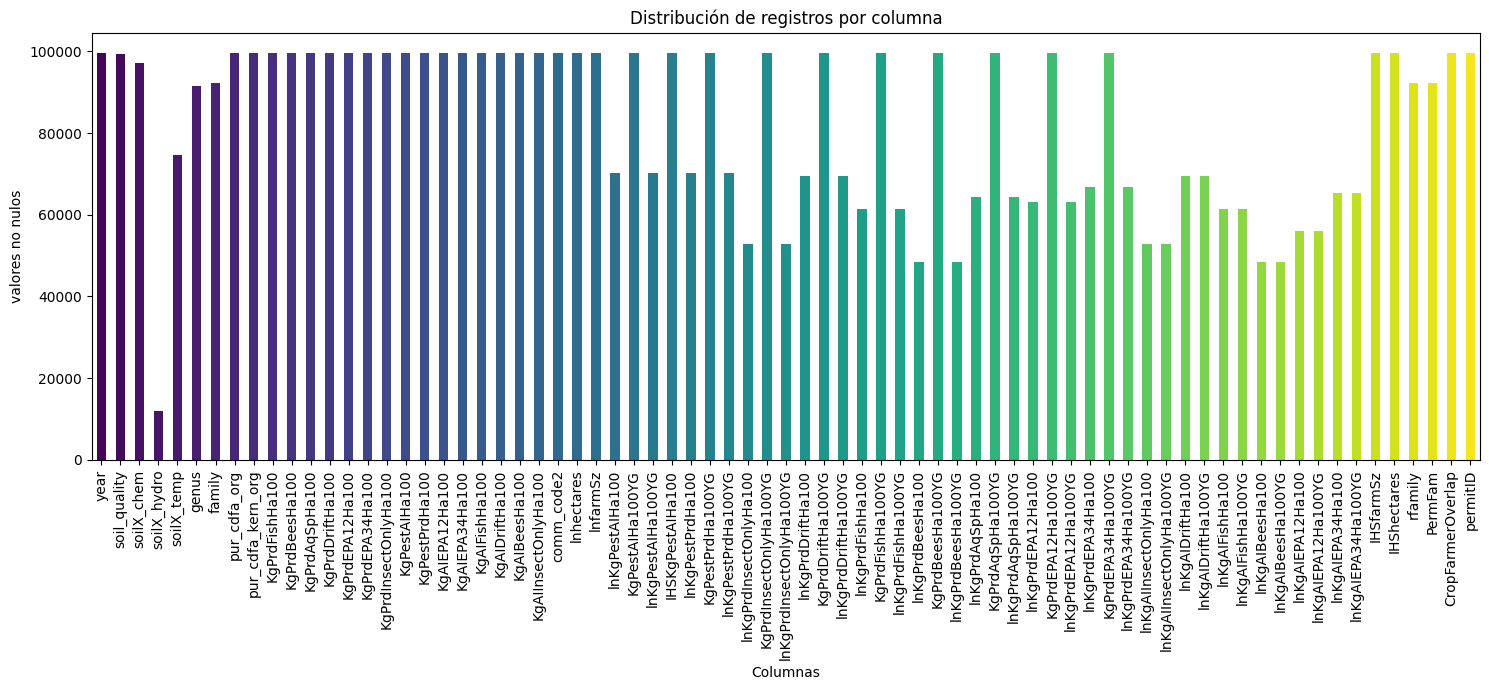

In [145]:
# Calculate the number of non-null values per column
non_null_counts = df_organic.notnull().sum()

# Create a bar plot
plt.figure(figsize=(15, 7))
non_null_counts.plot(kind='bar', color=sns.color_palette('viridis', len(non_null_counts)))
plt.title('Distribución de registros por columna')
plt.xlabel('Columnas')
plt.ylabel('valores no nulos')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# **Selección preliminar de características**

El objetivo es clasificar si un campo es orgánico o no.

La variable objetivo (Y) será:
pur_cdfa_org (1 = orgánico, 0 = no)

In [146]:
# Descartar columnas no deseadas (conservando el orden de las columnas restantes).
# Identify columns to keep
columns_to_keep = ['KgPestAIHa100', 'lnhectares']
for col in df_organic.columns:
    if not ('ln' in col or 'YG' in col or 'Ha100' in col):
        columns_to_keep.append(col)

# Drop columns not in the list of columns to keep
df_organic = df_organic[columns_to_keep]

print(df_organic.columns.tolist())

['KgPestAIHa100', 'lnhectares', 'year', 'soil_quality', 'soilX_chem', 'soilX_hydro', 'soilX_temp', 'genus', 'family', 'pur_cdfa_org', 'pur_cdfa_kern_org', 'comm_code2', 'IHSfarmSz', 'IHShectares', 'rfamily', 'PermFam', 'CropFarmerOverlap', 'permitID']


In [147]:
# Reorder columns to have 'pur_cdfa_org' as the first column
df_organic = df_organic[['pur_cdfa_org'] + [col for col in df_organic.columns if col != 'pur_cdfa_org']]

# Display the first 5 rows to confirm the change
display(df_organic.head())

,pur_cdfa_org,KgPestAIHa100,lnhectares,year,soil_quality,soilX_chem,soilX_hydro,soilX_temp,genus,family,pur_cdfa_kern_org,comm_code2,IHSfarmSz,IHShectares,rfamily,PermFam,CropFarmerOverlap,permitID
0,0,0.000000,3.478158,2018,1.0,1.000000,NaN,NaN,Avena,Poaceae,0,22006,4.864512,4.171544,Poaceae,1.0,0,1
1,0,0.000000,3.478158,2017,1.0,1.000000,NaN,NaN,Avena,Poaceae,0,22006,4.864512,4.171544,Poaceae,1.0,0,1
2,0,0.000000,3.478158,2019,1.0,1.000000,NaN,NaN,Avena,Poaceae,0,22006,4.864512,4.171544,Poaceae,1.0,0,1
3,0,2.092645,3.478158,2016,1.0,1.000000,NaN,NaN,Avena,Poaceae,0,22006,4.864512,4.171544,Poaceae,1.0,0,1
4,0,3063.872000,3.478158,2018,1.0,0.999995,NaN,1.0,Prunus,Rosaceae,0,3001,4.864512,4.171544,Rosaceae,2.0,0,1


In [148]:
#Conteo de valores únicos por columna
print(df_organic.nunique())

pur_cdfa_org             2
KgPestAIHa100        63468
lnhectares            3360
year                     7
soil_quality          7837
soilX_chem            7655
soilX_hydro             72
soilX_temp               1
genus                   70
family                  32
pur_cdfa_kern_org        2
comm_code2             158
IHSfarmSz             2337
IHShectares           3361
rfamily                 32
PermFam               2900
CropFarmerOverlap        2
permitID              1293
dtype: int64


In [149]:
# Descartar columnas no deseadas (conservando el orden de las columnas restantes).
df_organic = df_organic.drop(columns=["soilX_temp","IHSfarmSz"])

In [150]:
df_organic.head(5)

,pur_cdfa_org,KgPestAIHa100,lnhectares,year,soil_quality,soilX_chem,soilX_hydro,genus,family,pur_cdfa_kern_org,comm_code2,IHShectares,rfamily,PermFam,CropFarmerOverlap,permitID
0,0,0.000000,3.478158,2018,1.0,1.000000,NaN,Avena,Poaceae,0,22006,4.171544,Poaceae,1.0,0,1
1,0,0.000000,3.478158,2017,1.0,1.000000,NaN,Avena,Poaceae,0,22006,4.171544,Poaceae,1.0,0,1
2,0,0.000000,3.478158,2019,1.0,1.000000,NaN,Avena,Poaceae,0,22006,4.171544,Poaceae,1.0,0,1
3,0,2.092645,3.478158,2016,1.0,1.000000,NaN,Avena,Poaceae,0,22006,4.171544,Poaceae,1.0,0,1
4,0,3063.872000,3.478158,2018,1.0,0.999995,NaN,Prunus,Rosaceae,0,3001,4.171544,Rosaceae,2.0,0,1


De acuerdo con la documentación original del dataset (Larsen, 2021), muchas de las variables presentes corresponden a rendiciones, transformaciones logarítmicas o ajustes derivados de un mismo conjunto de métricas relacionadas con pesticidas (por ejemplo, sufijos ln, YG, Ha100). Estas columnas son altamente correlacionadas entre sí, ya que representan versiones matemáticas alternativas de la misma información. Para evitar problemas de multicolinealidad, redundancia y sobreajuste en los modelos de Machine Learning, se descartaron columnas duplicadas conceptualmente y se conservaron únicamente aquellas más representativas.

Además, se eliminaron variables de tipo identificador —como permitID, PermFam y códigos taxonómicos ambiguos— que, según el README, pueden contener vacíos atribuibles a clasificaciones agrícolas no definidas (e.g., cultivos sin taxonomía clara). Estas columnas no aportan valor predictivo y pueden inducir sesgos no deseados.


Entonces de todas las variables relacionadas con pesticidas,se decidió dejar solo una.
Seleccionamos KgPestAIHa100 porque es la medida más directa, completa y representativa del uso total de pesticidas por unidad de área, evitando redundancias y sesgos derivados de clasificación regulatoria o ecológica.

**Reconstrucción de área de finca:**

lnhectares, lnfarmSz, IHShectares, IHSfarmSz

Estas columnas son transformaciones matemáticas del mismo concepto: tamaño de la explotación agrícola / finca. Se hizo la función inversa de las transformaciones para obtener los datos en unidades de hectareas. Se descartó el dato de farmSz porque se desconocía las unidades de medida y porque con la hectáreas ya tendriamos la información necesaria.

In [151]:
# revertir log natural
df_organic['hectares_from_ln'] = np.exp(df_organic['lnhectares'])

# función inversa IHS
df_organic['hectares_from_IHS'] = (np.exp(df_organic['IHShectares']) - np.exp(-df_organic['IHShectares'])) / 2

df_organic[['lnhectares', 'IHShectares', 'hectares_from_ln', 'hectares_from_IHS']].head()


,lnhectares,IHShectares,hectares_from_ln,hectares_from_IHS
0,3.478158,4.171544,32.399986,32.400001
1,3.478158,4.171544,32.399986,32.400001
2,3.478158,4.171544,32.399986,32.400001
3,3.478158,4.171544,32.399986,32.400001
4,3.478158,4.171544,32.399986,32.400001


In [152]:
df_organic[['hectares_from_ln', 'hectares_from_IHS']].corr()

,hectares_from_ln,hectares_from_IHS
hectares_from_ln,1.0,1.0
hectares_from_IHS,1.0,1.0


In [153]:
# Check for negative values in 'hectares_from_ln' and 'hectares_from_IHS'
negative_hectares = df_organic[(df_organic['hectares_from_ln'] < 0) | (df_organic['hectares_from_IHS'] < 0)]

if negative_hectares.empty:
    print("No negative values found in 'hectares_from_ln' or 'hectares_from_IHS'.")
else:
    print("Rows with negative values in 'hectares_from_ln' or 'hectares_from_IHS':")
    display(negative_hectares)

No negative values found in 'hectares_from_ln' or 'hectares_from_IHS'.


Debido a que la base de datos no incluye el valor original en hectáreas, se reconstruyeron aproximaciones a la superficie del campo utilizando las transformaciones inversas de lnhectares e IHShectares. La reversión de lnhectares es exacta, ya que el logaritmo natural conserva la escala y el orden original. En contraste, la reversión de IHShectares representa únicamente una aproximación, dado que la transformación IHS puede incluir ajustes adicionales a los valores originales. La comparación entre ambas reconstrucciones permite evaluar la consistencia de las transformaciones y validar la utilidad de mantener ambas variables en el análisis exploratorio.

Como representan información redundante, se decidió dejar solo el valor de hectares_from_ln

In [154]:
# Descartar columnas no deseadas (conservando el orden de las columnas restantes).
df_organic = df_organic.drop(columns=["lnhectares","IHShectares","hectares_from_IHS"])
df_organic.head(5)

,pur_cdfa_org,KgPestAIHa100,year,soil_quality,soilX_chem,soilX_hydro,genus,family,pur_cdfa_kern_org,comm_code2,rfamily,PermFam,CropFarmerOverlap,permitID,hectares_from_ln
0,0,0.000000,2018,1.0,1.000000,NaN,Avena,Poaceae,0,22006,Poaceae,1.0,0,1,32.399986
1,0,0.000000,2017,1.0,1.000000,NaN,Avena,Poaceae,0,22006,Poaceae,1.0,0,1,32.399986
2,0,0.000000,2019,1.0,1.000000,NaN,Avena,Poaceae,0,22006,Poaceae,1.0,0,1,32.399986
3,0,2.092645,2016,1.0,1.000000,NaN,Avena,Poaceae,0,22006,Poaceae,1.0,0,1,32.399986
4,0,3063.872000,2018,1.0,0.999995,NaN,Prunus,Rosaceae,0,3001,Rosaceae,2.0,0,1,32.399986


# **Limpieza de datos**



*   Se renombraron columnas para mayor claridad.
*   soilX_hydro presentaba un *87.9%* de valores faltantes y fue eliminada.
*   Dado que solo el **10.6%** de las filas contenían valores nulos, se decidió eliminarlas en lugar de imputarlas (criterio < 20%).
*   El dataset resultante tuvo un tamaño final de **88,947 registros y 14 columnas.**










In [155]:
# Renombrar columnas
df_organic = df_organic.rename(columns={"hectares_from_ln": "Area (ha)", 'pur_cdfa_org': 'organic_certified'})

In [156]:
#Contar cantidad de valores nulos por campo(columna)
print(df_organic.isnull().sum())

organic_certified        0
KgPestAIHa100            1
year                     0
soil_quality           319
soilX_chem            2508
soilX_hydro          87571
genus                 8037
family                7367
pur_cdfa_kern_org        0
comm_code2               0
rfamily               7367
PermFam               7367
CropFarmerOverlap        0
permitID                 0
Area (ha)                1
dtype: int64


In [157]:
# porcentaje de nulos por columna
col_nulas= (df_organic.isnull().mean()*100)
print("Porcentaje de columnas con al menos un NaN:")
print(col_nulas)

Porcentaje de columnas con al menos un NaN:
organic_certified     0.000000
KgPestAIHa100         0.001005
year                  0.000000
soil_quality          0.320497
soilX_chem            2.519767
soilX_hydro          87.981875
genus                 8.074709
family                7.401565
pur_cdfa_kern_org     0.000000
comm_code2            0.000000
rfamily               7.401565
PermFam               7.401565
CropFarmerOverlap     0.000000
permitID              0.000000
Area (ha)             0.001005
dtype: float64


In [158]:
# Descartar columnas no deseadas (conservando el orden de las columnas restantes).
df_organic = df_organic.drop(columns=["soilX_hydro"])

In [159]:
# Calcular porcentaje de filas con al menos un NaN
fil_nulas= (df_organic.isnull().any(axis=1).mean()*100)
print("Porcentaje de filas con al menos un NaN:")
print(fil_nulas)

Porcentaje de filas con al menos un NaN:
10.635668572232325


In [160]:
#Mostrar las filas con valores nulos
filas_nulas = df_organic[df_organic.isnull().any(axis=1)]
print(filas_nulas)

       organic_certified  KgPestAIHa100  year  soil_quality  soilX_chem genus  \
170                    0            0.0  2016      1.894073    0.999018   NaN   
171                    0            0.0  2015      1.894073    0.999018   NaN   
172                    0            0.0  2015      1.894073    0.999018   NaN   
554                    0            0.0  2016      1.000000    1.000000   NaN   
555                    0            0.0  2017      1.000000    0.999795   NaN   
...                  ...            ...   ...           ...         ...   ...   
99512                  0            0.0  2014      1.885774    1.000000   NaN   
99513                  0            0.0  2016      1.885774    1.000000   NaN   
99514                  0            0.0  2018      1.885774    1.000000   NaN   
99515                  0            0.0  2019      1.885774    1.000000   NaN   
99516                  0            0.0  2017      1.885774    1.000000   NaN   

      family  pur_cdfa_kern

In [161]:
#imprimir shape de la tabla (filas, columnas) antes de la eliminación para comparar
print(df_organic.shape)

(99533, 14)


In [162]:
#Eliminar filas con valores nulos (usar cuando la cantidad relativa de filas con nulos es baja, menor del 20% )
#imprimir shape
df_organic = df_organic.dropna()
print(df_organic.shape)

(88947, 14)


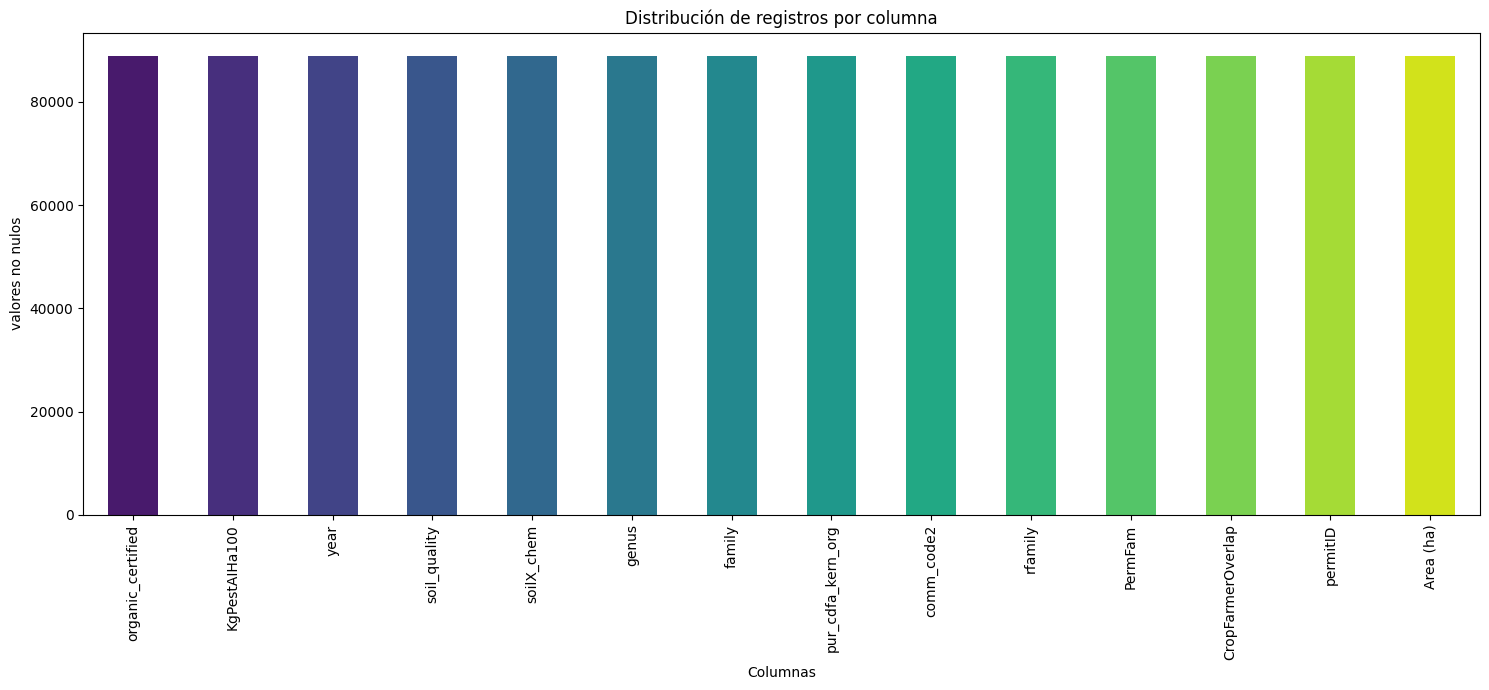

In [163]:
# Calculate the number of non-null values per column
non_null_counts = df_organic.notnull().sum()

# Create a bar plot
plt.figure(figsize=(15, 7))
non_null_counts.plot(kind='bar', color=sns.color_palette('viridis', len(non_null_counts)))
plt.title('Distribución de registros por columna')
plt.xlabel('Columnas')
plt.ylabel('valores no nulos')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [164]:
#Descripción de la Información de la tabla y tipo de datos
df_organic.info()

<class 'pandas.core.frame.DataFrame'>
Index: 88947 entries, 0 to 99532
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   organic_certified  88947 non-null  int64  
 1   KgPestAIHa100      88947 non-null  float64
 2   year               88947 non-null  int64  
 3   soil_quality       88947 non-null  float64
 4   soilX_chem         88947 non-null  float64
 5   genus              88947 non-null  object 
 6   family             88947 non-null  object 
 7   pur_cdfa_kern_org  88947 non-null  int64  
 8   comm_code2         88947 non-null  int64  
 9   rfamily            88947 non-null  object 
 10  PermFam            88947 non-null  float64
 11  CropFarmerOverlap  88947 non-null  int64  
 12  permitID           88947 non-null  int64  
 13  Area (ha)          88947 non-null  float64
dtypes: float64(5), int64(6), object(3)
memory usage: 10.2+ MB


Tras analizar la cantidad de valores únicos, se determinó que las variables soilX_temp y soilX_hydro presentan muy baja variabilidad y/o gran proporción de valores faltantes. Según la literatura, las columnas con baja varianza aportan poca información al proceso de clasificación y pueden introducir ruido. Además, el README del dataset indica que estas variables son propensas a valores faltantes debido a limitaciones en la medición de la calidad del suelo. Por estas razones, fueron eliminadas del análisis sin afectar la integridad del modelos.

# **Selección de Caracteristicas**

In [165]:
# Calculate variance of numerical columns
print("Variance of numerical columns:")
print(df_organic.select_dtypes(include=np.number).var())

Variance of numerical columns:
organic_certified    8.449769e-02
KgPestAIHa100        6.706392e+07
year                 4.037304e+00
soil_quality         1.113615e+00
soilX_chem           8.036918e-05
pur_cdfa_kern_org    8.804603e-02
comm_code2           1.251704e+08
PermFam              6.200548e+05
CropFarmerOverlap    2.363933e-01
permitID             1.179535e+05
Area (ha)            9.771553e+02
dtype: float64


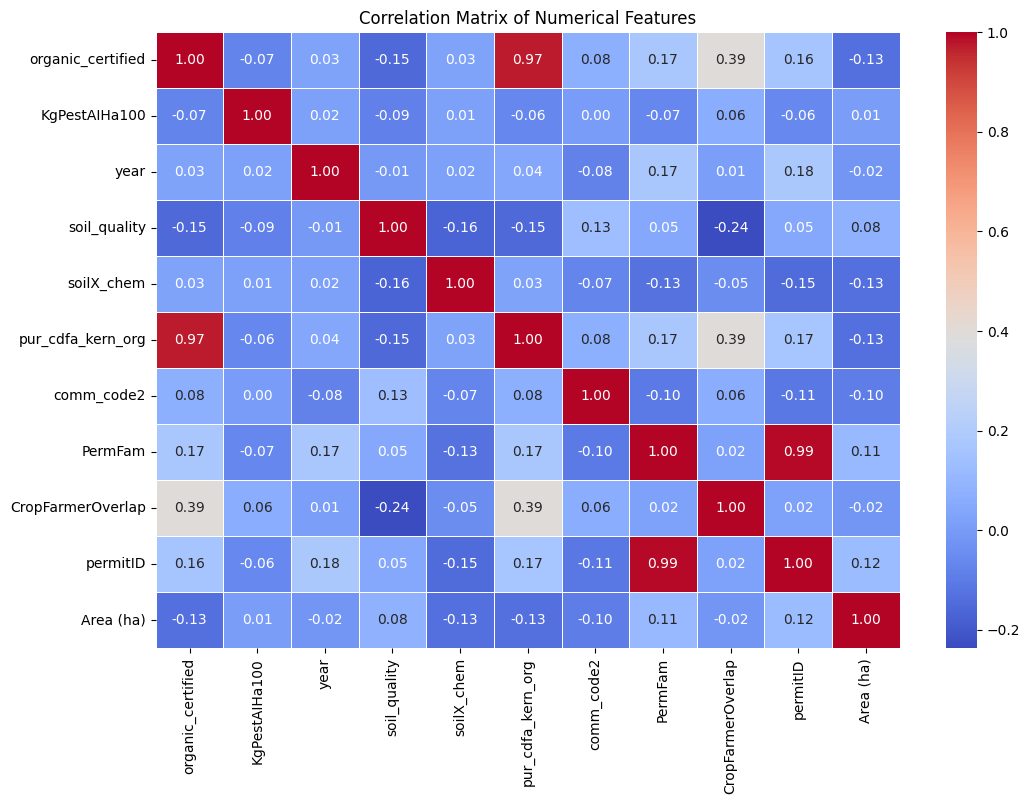

In [166]:
# Calculate correlation matrix for numerical columns
corr_matrix = df_organic.select_dtypes(include=np.number).corr()

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

In [167]:
# Calculate the correlation matrix
corr_matrix = df_organic.select_dtypes(include=np.number).corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find index of feature columns with correlation greater than 0.90
to_drop_hicorr = [column for column in upper.columns if any(upper[column] > 0.90)]

# Drop features
df_organic = df_organic.drop(columns=to_drop_hicorr)

print("Columns dropped due to high correlation ( > 0.9):")
print(to_drop_hicorr)
print("\nRemaining columns:")
print(df_organic.columns.tolist())

Columns dropped due to high correlation ( > 0.9):
['pur_cdfa_kern_org', 'permitID']

Remaining columns:
['organic_certified', 'KgPestAIHa100', 'year', 'soil_quality', 'soilX_chem', 'genus', 'family', 'comm_code2', 'rfamily', 'PermFam', 'CropFarmerOverlap', 'Area (ha)']



Se eliminó pur_cdfa_kern_org y permitID por correlación > 0.9.



In [168]:
# Compare unique values in 'family' and 'rfamily'
print("Unique values in 'family':")
print(df_organic['family'].unique())

print("\nUnique values in 'rfamily':")
print(df_organic['rfamily'].unique())

# Check if the columns are identical
print("\nAre 'family' and 'rfamily' identical?")
print(df_organic['family'].equals(df_organic['rfamily']))

Unique values in 'family':
['Poaceae' 'Rosaceae' 'Vitaceae' 'Amaryllidaceae' 'Apiaceae' 'Cannabaceae'
 'Convolvulaceae' 'Malvaceae' 'Solanaceae' 'Fabaceae' 'Asteraceae'
 'Cucurbitaceae' 'Juglandaceae' 'Rutaceae' 'Amaranthaceae' 'Brassicaceae'
 'Oleaceae' 'Anacardiaceae' 'Lythraceae' 'Ebenaceae' 'Piperaceae'
 'Dioscoreaceae' 'Rhamnaceae' 'Asparagaceae' 'Ericacea' 'Lauraceae'
 'Fagaceae' 'Actinidiaceae' 'Moraceae' 'Lamiaceae' 'Caricaceae']

Unique values in 'rfamily':
['Poaceae' 'Rosaceae' 'Vitaceae' 'Amaryllidaceae' 'Apiaceae' 'Cannabaceae'
 'Convolvulaceae' 'Malvaceae' 'Solanaceae' 'Fabaceae' 'Asteraceae'
 'Cucurbitaceae' 'Juglandaceae' 'Rutaceae' 'Amaranthaceae' 'Brassicaceae'
 'Oleaceae' 'Anacardiaceae' 'Lythraceae' 'Ebenaceae' 'Piperaceae'
 'Dioscoreaceae' 'Rhamnaceae' 'Asparagaceae' 'Ericacea' 'Lauraceae'
 'Fagaceae' 'Actinidiaceae' 'Moraceae' 'Lamiaceae' 'Caricaceae']

Are 'family' and 'rfamily' identical?
True


Family y rfamily están correlacionados.



In [169]:
# Descartar columnas no deseadas (conservando el orden de las columnas restantes).
df_organic = df_organic.drop(columns=["rfamily"])

Según el README, PermFam representa un identificador único para cada combinación de permit (farmer) – crop family. Al explorar la relación con la variable family, se observó que una misma familia corresponde a múltiples códigos diferentes. Esto indica que PermFam funciona como un identificador relacional, una relación compleja entre productor y cultivo, y no como una codificación única de la familia biológica. Debido a su alto cardinalidad y al riesgo de sobreajuste, esta columna fue excluida del modelo de clasificación. En su lugar, se mantuvo la variable family, que captura adecuadamente la información taxonómica relevante con menor complejidad categórica.

In [170]:
# Descartar columnas no deseadas (conservando el orden de las columnas restantes).
df_organic = df_organic.drop(columns=["PermFam"])

**Codificación de variables categóricas**

Las columnas genus y family fueron convertidas a valores numéricos mediante LabelEncoder, generando genus_code y family_code.
Se comprobó que cada nombre correspondía a un único valor codificado, sin duplicidades.

In [171]:
# Crear el codificador
genus_encoder = LabelEncoder()

# Ajustar y transformar
df_organic['genus_code'] = genus_encoder.fit_transform(df_organic['genus'])

# Ver los mapeos
genus_mapping = dict(zip(genus_encoder.classes_, genus_encoder.transform(genus_encoder.classes_)))
genus_mapping

{'Abelmoschus': np.int64(0),
 'Actinidia': np.int64(1),
 'Allium': np.int64(2),
 'Anacardium': np.int64(3),
 'Anethum': np.int64(4),
 'Apium': np.int64(5),
 'Asparagus': np.int64(6),
 'Avena': np.int64(7),
 'Beta': np.int64(8),
 'Brassica': np.int64(9),
 'Cannabis': np.int64(10),
 'Capsicum': np.int64(11),
 'Carica': np.int64(12),
 'Carthamus': np.int64(13),
 'Carya': np.int64(14),
 'Castanea': np.int64(15),
 'Cicer': np.int64(16),
 'Citrullus': np.int64(17),
 'Citrus': np.int64(18),
 'Coriandrum': np.int64(19),
 'Cucumis': np.int64(20),
 'Cucurbita': np.int64(21),
 'Curcurbita': np.int64(22),
 'Cyanococcus': np.int64(23),
 'Cydonia': np.int64(24),
 'Cynara': np.int64(25),
 'Cynodon': np.int64(26),
 'Daucus': np.int64(27),
 'Dioscorea': np.int64(28),
 'Diospyros': np.int64(29),
 'Eragrostis': np.int64(30),
 'Eruca': np.int64(31),
 'Ficus': np.int64(32),
 'Foeniculum': np.int64(33),
 'Fragaria': np.int64(34),
 'Glycine': np.int64(35),
 'Gossypium': np.int64(36),
 'Hordeum': np.int64(37)

In [172]:
# Crear el codificador para 'family'
family_encoder = LabelEncoder()

# Ajustar y transformar
df_organic['family_code'] = family_encoder.fit_transform(df_organic['family'])

# Ver los mapeos
family_mapping = dict(zip(family_encoder.classes_, family_encoder.transform(family_encoder.classes_)))
family_mapping

{'Actinidiaceae': np.int64(0),
 'Amaranthaceae': np.int64(1),
 'Amaryllidaceae': np.int64(2),
 'Anacardiaceae': np.int64(3),
 'Apiaceae': np.int64(4),
 'Asparagaceae': np.int64(5),
 'Asteraceae': np.int64(6),
 'Brassicaceae': np.int64(7),
 'Cannabaceae': np.int64(8),
 'Caricaceae': np.int64(9),
 'Convolvulaceae': np.int64(10),
 'Cucurbitaceae': np.int64(11),
 'Dioscoreaceae': np.int64(12),
 'Ebenaceae': np.int64(13),
 'Ericacea': np.int64(14),
 'Fabaceae': np.int64(15),
 'Fagaceae': np.int64(16),
 'Juglandaceae': np.int64(17),
 'Lamiaceae': np.int64(18),
 'Lauraceae': np.int64(19),
 'Lythraceae': np.int64(20),
 'Malvaceae': np.int64(21),
 'Moraceae': np.int64(22),
 'Oleaceae': np.int64(23),
 'Piperaceae': np.int64(24),
 'Poaceae': np.int64(25),
 'Rhamnaceae': np.int64(26),
 'Rosaceae': np.int64(27),
 'Rutaceae': np.int64(28),
 'Solanaceae': np.int64(29),
 'Vitaceae': np.int64(30)}

In [173]:
display(df_organic[['genus', 'genus_code']].drop_duplicates().sort_values(by='genus_code'))
display(df_organic[['family', 'family_code']].drop_duplicates().sort_values(by='family_code'))

,genus,genus_code
39232,Abelmoschus,0
53049,Actinidia,1
173,Allium,2
72295,Anacardium,3
58750,Anethum,4
...,...,...
95787,Vicia,65
14,Vitis,66
1507,Zea,67
34643,Ziziphus,68


,family,family_code
53049,Actinidiaceae,0
1047,Amaranthaceae,1
173,Amaryllidaceae,2
3633,Anacardiaceae,3
200,Apiaceae,4
34702,Asparagaceae,5
569,Asteraceae,6
1358,Brassicaceae,7
247,Cannabaceae,8
85530,Caricaceae,9


In [174]:
df_organic.head(5)

,organic_certified,KgPestAIHa100,year,soil_quality,soilX_chem,genus,family,comm_code2,CropFarmerOverlap,Area (ha),genus_code,family_code
0,0,0.000000,2018,1.0,1.000000,Avena,Poaceae,22006,0,32.399986,7,25
1,0,0.000000,2017,1.0,1.000000,Avena,Poaceae,22006,0,32.399986,7,25
2,0,0.000000,2019,1.0,1.000000,Avena,Poaceae,22006,0,32.399986,7,25
3,0,2.092645,2016,1.0,1.000000,Avena,Poaceae,22006,0,32.399986,7,25
4,0,3063.872000,2018,1.0,0.999995,Prunus,Rosaceae,3001,0,32.399986,50,27


In [175]:
# Descartar columnas no deseadas (conservando el orden de las columnas restantes).
df_organic = df_organic.drop(columns=["genus", "family"])
df_organic.head(5)

,organic_certified,KgPestAIHa100,year,soil_quality,soilX_chem,comm_code2,CropFarmerOverlap,Area (ha),genus_code,family_code
0,0,0.000000,2018,1.0,1.000000,22006,0,32.399986,7,25
1,0,0.000000,2017,1.0,1.000000,22006,0,32.399986,7,25
2,0,0.000000,2019,1.0,1.000000,22006,0,32.399986,7,25
3,0,2.092645,2016,1.0,1.000000,22006,0,32.399986,7,25
4,0,3063.872000,2018,1.0,0.999995,3001,0,32.399986,50,27


In [176]:
#Conteo de valores únicos por columna
print(df_organic.nunique())

organic_certified        2
KgPestAIHa100        60860
year                     7
soil_quality          7196
soilX_chem            7083
comm_code2             134
CropFarmerOverlap        2
Area (ha)             3061
genus_code              70
family_code             31
dtype: int64


Se realizó una codificación numérica mediante Label Encoding para transformar la variable categórica genus y family en una representación numérica adecuada para modelos de aprendizaje automático. Al verificar la relación entre la variable original (genus y family) y su código asignado respectivamente, se confirmó que cada género corresponde consistentemente a un solo valor numérico, sin colisiones o duplicidades. Esto permite conservar la información taxonómica relevante, mantener interpretabilidad y evitar el alto cardinalidad asociado a identificadores relacionales como PermFam.

Además se notó una diferencia entre el numero de valores unicos antes y despues de la codificación: La columna family_code tiene menos valores únicos que la columna 'family' original porque eliminamos las filas con valores nulos anteriormente en el paso de limpieza de datos. LabelEncoder solo codificó los valores no nulos que quedaron después de eliminar esas filas.

In [177]:
# Resumen de estadísticas
df_organic.describe()

,organic_certified,KgPestAIHa100,year,soil_quality,soilX_chem,comm_code2,CropFarmerOverlap,Area (ha),genus_code,family_code
count,88947.000000,88947.000000,88947.000000,88947.000000,88947.000000,88947.000000,88947.000000,88947.000000,88947.000000,88947.000000
mean,0.093179,2735.640499,2016.028635,1.799876,0.998026,15268.633726,0.383341,30.368823,45.256557,20.818544
std,0.290685,8189.256335,2.009304,1.055279,0.008965,11187.959662,0.486203,31.259483,18.211490,9.758323
min,0.000000,0.000000,2013.000000,1.000000,0.850000,1.000000,0.000000,0.004500,0.000000,0.000000
25%,0.000000,1.343199,2014.000000,1.000000,0.998750,3001.000000,0.000000,13.608002,36.000000,15.000000
50%,0.000000,444.421900,2016.000000,1.194295,0.999603,14013.000000,0.000000,24.705009,50.000000,25.000000
75%,0.000000,2960.790500,2018.000000,2.117826,1.000000,29111.000000,1.000000,32.399986,63.000000,28.000000
max,1.000000,943862.300000,2019.000000,6.000000,1.000000,33008.000000,1.000000,295.650200,69.000000,30.000000


**Nota sobre comm_code2 y CropFarmerOverlap:**

La variable comm_code2 representa el código del cultivo o producto agrícola, lo cual influye directamente en los patrones de uso de pesticidas y en la probabilidad de manejo orgánico.


Por otro lado, CropFarmerOverlap indica si un mismo agricultor cultiva la misma familia de plantas en varios campos (1) o no (0). Esta variable puede reflejar la escala de producción o especialización del productor, factores potencialmente asociados a la adopción de prácticas orgánicas. Ambas variables se conservarán en el análisis.

Esta variable mide la especialización o diversificación del agricultor.

Si CropFarmerOverlap = 1, podría implicar mayor escala de producción, lo que en ocasiones se relaciona con menos agricultura orgánica (por los requerimientos de control de plagas).

Si = 0, podría implicar productores pequeños o más diversificados, más afines al manejo orgánico.

**Las columnas seleccionadas fueron:**

Y (objetivo): organic_certified

X (características): KgPestAIHa100, year, soil_quality, soilX_chem, comm_code2, CropFarmerOverlap, Area (ha), genus_code, family_code.

# **Transformación de los datos**

Se aplicó StandardScaler a las variables numéricas.

In [178]:
# Select numerical columns to scale (excluding 'organic_certified')
numerical_cols = df_organic.select_dtypes(include=np.number).columns.tolist()
numerical_cols.remove('organic_certified')

# Initialize the StandardScaler
scaler = StandardScaler()

# Apply StandardScaler to the numerical columns
df_organic[numerical_cols] = scaler.fit_transform(df_organic[numerical_cols])

# Display the first 5 rows of the scaled DataFrame
display(df_organic.head())

,organic_certified,KgPestAIHa100,year,soil_quality,soilX_chem,comm_code2,CropFarmerOverlap,Area (ha),genus_code,family_code
0,0,-0.334054,0.981124,-0.75798,0.220222,0.602201,-0.788442,0.064978,-2.100694,0.428504
1,0,-0.334054,0.483436,-0.75798,0.220222,0.602201,-0.788442,0.064978,-2.100694,0.428504
2,0,-0.334054,1.478811,-0.75798,0.220222,0.602201,-0.788442,0.064978,-2.100694,0.428504
3,0,-0.333799,-0.014251,-0.75798,0.220222,0.602201,-0.788442,0.064978,-2.100694,0.428504
4,0,0.040081,0.981124,-0.75798,0.219626,-1.096509,-0.788442,0.064978,0.260466,0.633458


# **Extraccion de caracteristicas**

Posteriormente, se utilizó **PCA** para reducción dimensional, reteniendo **8** componentes principales que explicaban el **95%** de la varianza.

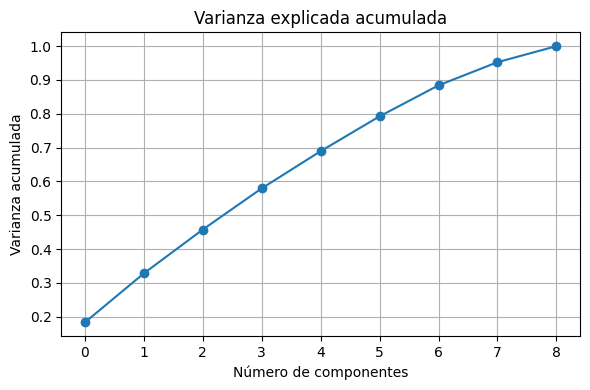

Original number of features: 9
Number of features after PCA (95% variance): 8


In [179]:
# PCA para analizar varianza

# Separate features (X) from the target variable (y)
X = df_organic.drop('organic_certified', axis=1)
y = df_organic['organic_certified']

pca = PCA().fit(X)

# Graficar la varianza acumulada
plt.figure(figsize=(6, 4))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Número de componentes')
plt.ylabel('Varianza acumulada')
plt.title('Varianza explicada acumulada')
plt.grid(True)
plt.tight_layout()
plt.show()

# ===========================
# PCA conservando 95% de la varianza
# ===========================
pca_95 = PCA(n_components=0.95, svd_solver='full')
X_pca = pca_95.fit_transform(X)

print(f"Original number of features: {X.shape[1]}")
print(f"Number of features after PCA (95% variance): {X_pca.shape[1]}")

Solo visualización:

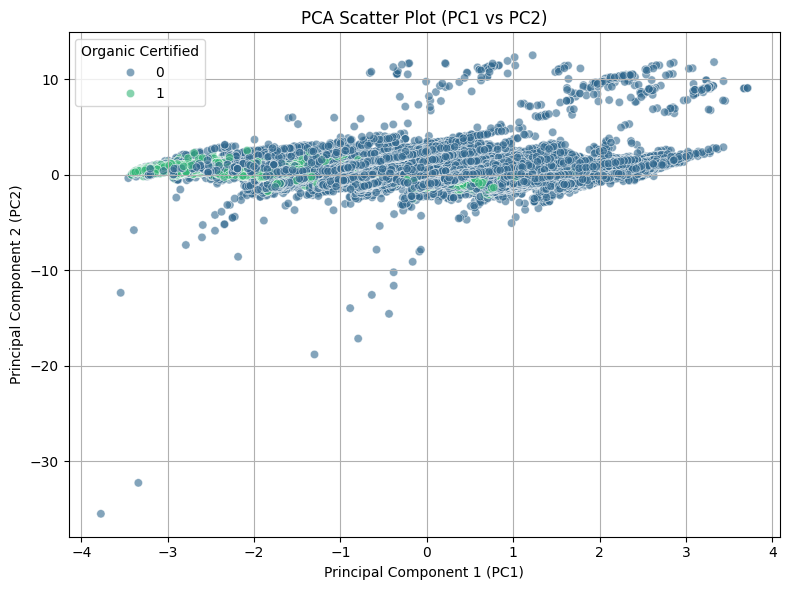

In [180]:
# Create a scatter plot of the first two principal components
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', hue='organic_certified', data=df_pca, palette='viridis', alpha=0.6)
plt.title('PCA Scatter Plot (PC1 vs PC2)')
plt.xlabel('Principal Component 1 (PC1)')
plt.ylabel('Principal Component 2 (PC2)')
plt.legend(title='Organic Certified')
plt.grid(True)
plt.tight_layout()
plt.show()

In [127]:
# Create a DataFrame with the principal components
df_pca = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(X_pca.shape[1])])

# Add the 'organic_certified' column back to the PCA DataFrame
df_pca['organic_certified'] = y.reset_index(drop=True)

# Display the first 5 rows of the PCA DataFrame
display(df_pca.head())

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,organic_certified
0,-1.001903,-0.141451,-0.647512,-0.403379,0.611527,-0.051787,-0.247349,-1.404064,0
1,-0.961636,-0.105279,-0.515318,-0.460244,0.152054,0.031517,-0.299600,-1.349571,0
2,-1.042170,-0.177623,-0.779707,-0.346515,1.071000,-0.135090,-0.195098,-1.458556,0
3,-0.921380,-0.069183,-0.383083,-0.516992,-0.307392,0.115027,-0.351825,-1.295075,0
4,0.024350,-0.878324,-1.504115,0.444950,0.471270,-0.256972,-0.371903,-0.367950,0


# **Clasificación con metodos de ML**

**Modelos empleados**

Se compararon los siguientes clasificadores:

*   Regresión Logística
*   Árbol de Decisión
*   Random Forest
*   SVM (RBF)

Los datos se dividieron en 80% entrenamiento y 20% prueba.

**Tamaños resultantes:**

Entrenamiento: (71,157, 8)

Prueba: (17,790, 8)

**Justificación de los modelos:**

Se seleccionaron cuatro modelos supervisados para clasificar si un campo es orgánico o no: Regresión Logística, Árbol de Decisión, Random Forest y SVM. La Regresión Logística sirvió como modelo base por su simplicidad e interpretabilidad. El Árbol de Decisión permitió capturar relaciones no lineales entre variables. El Random Forest, al combinar múltiples árboles, reduce el sobreajuste y mejora la precisión. Finalmente, el SVM con kernel RBF se utilizó por su capacidad de separar clases en espacios no lineales.

Tamaño entrenamiento: (71157, 8)
Tamaño prueba: (17790, 8)

Entrenando Regresión Logística...


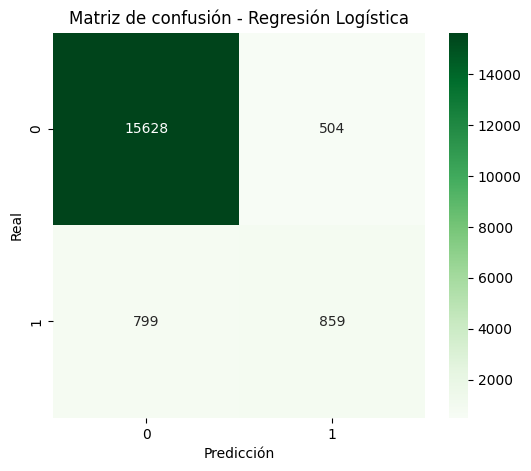


Entrenando Árbol de Decisión...


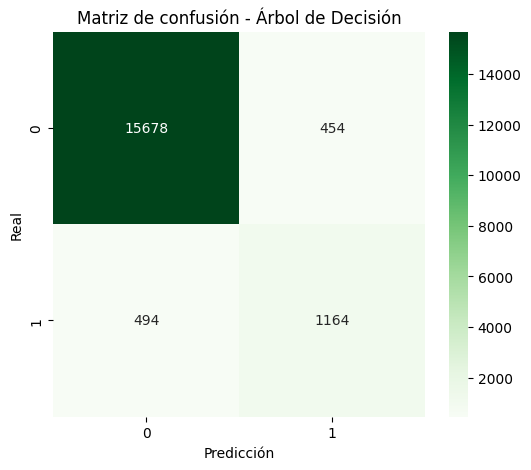


Entrenando Random Forest...


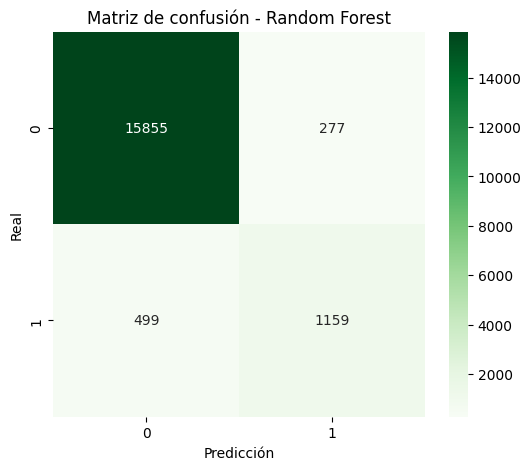


Entrenando SVM (RBF)...


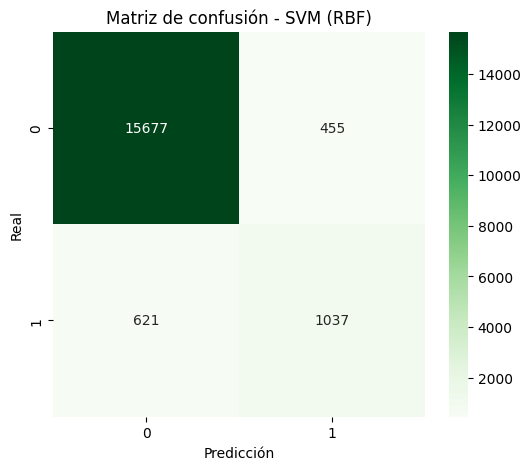

In [128]:
# PREPARACIÓN DE DATOS
# Separar variables predictoras (X) y variable objetivo (y)
X = df_pca.drop(columns=['organic_certified'])
y = df_pca['organic_certified']

# División en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Tamaño entrenamiento:", X_train.shape)
print("Tamaño prueba:", X_test.shape)

# ENTRENAMIENTO DE CLASIFICADORES

# Definir modelos
models = {
    "Regresión Logística": LogisticRegression(max_iter=1000, random_state=42),
    "Árbol de Decisión": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42),
    "SVM (RBF)": SVC(kernel='rbf', C=1, gamma='scale', random_state=42)
}

# Diccionario para resultados
results = []

# Entrenar y evaluar cada modelo
for name, model in models.items():
    print(f"\nEntrenando {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Calcular métricas
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    cm = confusion_matrix(y_test, y_pred)

    results.append({
        'Modelo': name,
        'Accuracy': acc,
        'F1-score': f1
    })

    # Matriz de confusión visual
    plt.figure(figsize=(6,5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
    plt.title(f'Matriz de confusión - {name}')
    plt.xlabel('Predicción')
    plt.ylabel('Real')
    plt.show()

**Rendimiento inicial:**

In [129]:
# TABLA RESUMEN DE RESULTADOS
df_results = pd.DataFrame(results)
df_results = df_results.sort_values(by='Accuracy', ascending=False).reset_index(drop=True)

print("\n🔹 Resultados comparativos:")
display(df_results)



🔹 Resultados comparativos:


,Modelo,Accuracy,F1-score
0,Random Forest,0.956380,0.954964
1,Árbol de Decisión,0.946712,0.946419
2,SVM (RBF),0.939517,0.938078
3,Regresión Logística,0.926757,0.923512


In [130]:
# REPORTE DETALLADO DEL MEJOR MODELO
best_model_name = df_results.iloc[0]['Modelo']
best_model = models[best_model_name]

print(f"\n🔹 Reporte de clasificación - {best_model_name}:\n")
print(classification_report(y_test, best_model.predict(X_test)))


🔹 Reporte de clasificación - Random Forest:

              precision    recall  f1-score   support

           0       0.97      0.98      0.98     16132
           1       0.81      0.70      0.75      1658

    accuracy                           0.96     17790
   macro avg       0.89      0.84      0.86     17790
weighted avg       0.95      0.96      0.95     17790



## **Ajuste de hiperparámetros (GridSearchCV)**

Luego de la evaluación inicial, se aplicó un proceso de validación cruzada con búsqueda en cuadrícula (GridSearchCV).
El objetivo fue optimizar los hiperparámetros que controlan la complejidad, la regularización y la capacidad de generalización de cada modelo, evitando tanto el subajuste como el sobreajuste. Esto permitió comparar múltiples combinaciones de parámetros, garantizando que la elección final no dependiera del azar ni de un solo subconjunto de los datos.

Definir las cuadrículas de hiperparámetros para cada modelo como diccionario:

In [131]:
# Define hyperparameter grids for each model
param_grid_lr = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'lbfgs']
}

param_grid_dt = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10]
}

param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10]
}

param_grid_svm = {
    'C': [0.1, 1],
    'gamma': ['scale', 'auto']
}

print("Hyperparameter grids defined.")

Hyperparameter grids defined.


Se realizó validación cruzada para optimizar parámetros clave con grid search en los datos de entrenamiento.


In [132]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameter grids (assuming they are already defined from the previous step)
param_grids = {
    "Regresión Logística": param_grid_lr,
    "Árbol de Decisión": param_grid_dt,
    "Random Forest": param_grid_rf,
    "SVM (RBF)": param_grid_svm
}

# Perform GridSearchCV for each model
for name, model in models.items():
    print(f"Performing GridSearchCV for {name}...")

    # Initialize GridSearchCV
    grid_search = GridSearchCV(estimator=model, param_grid=param_grids[name], cv=5, scoring='accuracy', n_jobs=-1)

    # Fit GridSearchCV to the training data
    grid_search.fit(X_train, y_train)

    # Print the best hyperparameters and best score
    print(f"Best hyperparameters for {name}: {grid_search.best_params_}")
    print(f"Best cross-validation accuracy for {name}: {grid_search.best_score_:.4f}")

    # Store the best estimator
    models[name] = grid_search.best_estimator_

print("\nGridSearchCV completed for all models.")

Performing GridSearchCV for Regresión Logística...
Best hyperparameters for Regresión Logística: {'C': 10, 'solver': 'liblinear'}
Best cross-validation accuracy for Regresión Logística: 0.9292
Performing GridSearchCV for Árbol de Decisión...
Best hyperparameters for Árbol de Decisión: {'max_depth': 10, 'min_samples_split': 5}
Best cross-validation accuracy for Árbol de Decisión: 0.9445
Performing GridSearchCV for Random Forest...
Best hyperparameters for Random Forest: {'max_depth': None, 'n_estimators': 200}
Best cross-validation accuracy for Random Forest: 0.9572
Performing GridSearchCV for SVM (RBF)...
Best hyperparameters for SVM (RBF): {'C': 1, 'gamma': 'auto'}
Best cross-validation accuracy for SVM (RBF): 0.9430

GridSearchCV completed for all models.


## **Entrenar modelos con los mejores hiperparámetros**
Entrenar cada modelo en el conjunto de datos de entrenamiento completo utilizando los mejores hiperparámetros encontrados durante el GridSearch


In [133]:
# Train each model on the full training data using the best hyperparameters
#recorre el diccionario de modelos y entrena cada modelo
print("Training models with best hyperparameters on the full training data...")
for name, model in models.items():
    print(f"\nTraining {name}...")
    model.fit(X_train, y_train)
    print(f"{name} training complete.")

Training models with best hyperparameters on the full training data...

Training Regresión Logística...
Regresión Logística training complete.

Training Árbol de Decisión...
Árbol de Decisión training complete.

Training Random Forest...
Random Forest training complete.

Training SVM (RBF)...
SVM (RBF) training complete.


## **Evaluar modelos**

 Se iteró a través de los modelos entrenados, se hizo predicciones en el conjunto de prueba, se calcularon las métricas de evaluación y muestra la matriz de confusión para cada modelo.



Evaluating Regresión Logística on the test set...


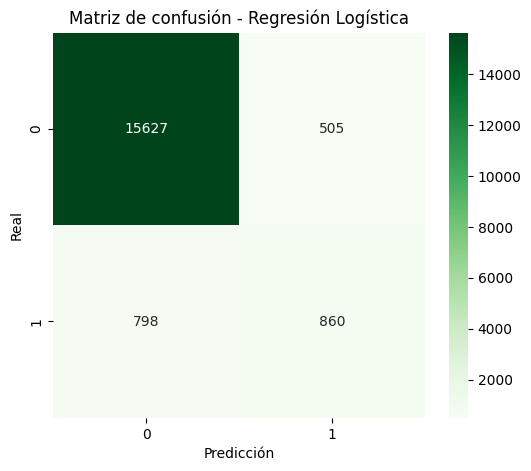


Evaluating Árbol de Decisión on the test set...


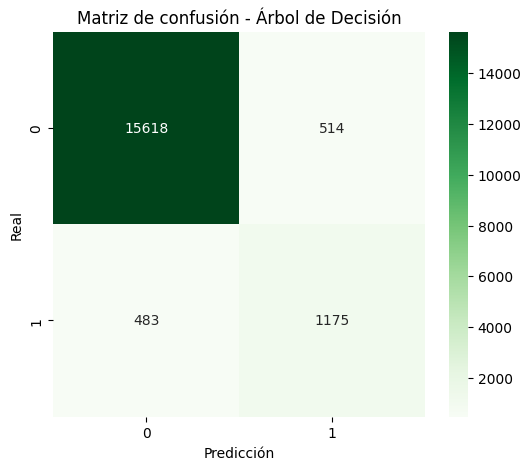


Evaluating Random Forest on the test set...


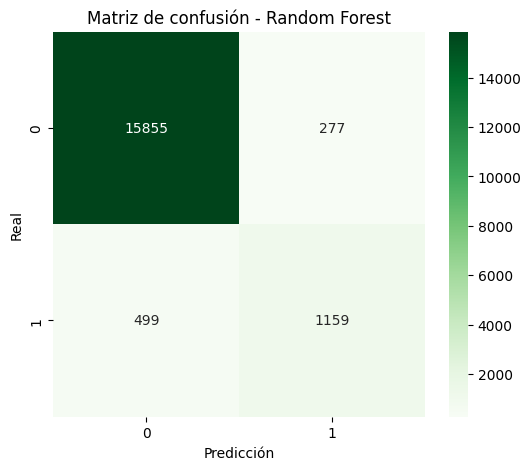


Evaluating SVM (RBF) on the test set...


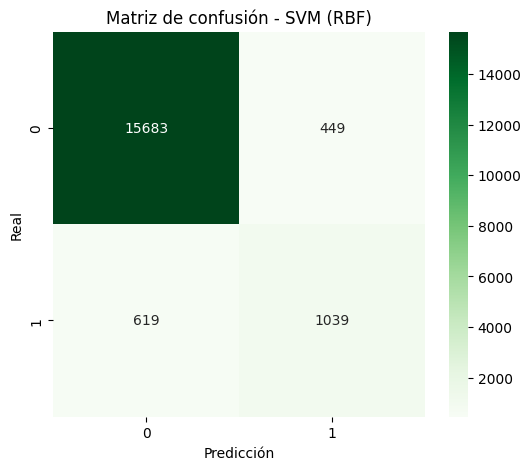


Evaluation complete for all models.


In [134]:
# Dictionary to store results
results = []

# Evaluate each model on the test set
for name, model in models.items():
    print(f"\nEvaluating {name} on the test set...")
    y_pred = model.predict(X_test)

    # Calculate metrics
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    cm = confusion_matrix(y_test, y_pred)

    results.append({
        'Modelo': name,
        'Accuracy': acc,
        'F1-score': f1
    })

    # Matriz de confusión visual
    plt.figure(figsize=(6,5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
    plt.title(f'Matriz de confusión - {name}')
    plt.xlabel('Predicción')
    plt.ylabel('Real')
    plt.show()

print("\nEvaluation complete for all models.")

In [135]:
# TABLA RESUMEN DE RESULTADOS
df_results = pd.DataFrame(results)
df_results = df_results.sort_values(by='Accuracy', ascending=False).reset_index(drop=True)

print("\n🔹 Resultados comparativos:")
display(df_results)

# REPORTE DETALLADO DEL MEJOR MODELO
best_model_name = df_results.iloc[0]['Modelo']
best_model = models[best_model_name]

print(f"\n🔹 Reporte de clasificación - {best_model_name}:\n")
print(classification_report(y_test, best_model.predict(X_test)))


🔹 Resultados comparativos:


,Modelo,Accuracy,F1-score
0,Random Forest,0.956380,0.954964
1,Árbol de Decisión,0.943957,0.944190
2,SVM (RBF),0.939966,0.938502
3,Regresión Logística,0.926757,0.923537



🔹 Reporte de clasificación - Random Forest:

              precision    recall  f1-score   support

           0       0.97      0.98      0.98     16132
           1       0.81      0.70      0.75      1658

    accuracy                           0.96     17790
   macro avg       0.89      0.84      0.86     17790
weighted avg       0.95      0.96      0.95     17790



Tabla de resultados comparativos e informe de clasificación detallado para el mejor modelo.

In [136]:
# TABLA RESUMEN DE RESULTADOS
df_results = pd.DataFrame(results)
df_results = df_results.sort_values(by='Accuracy', ascending=False).reset_index(drop=True)

print("\n🔹 Resultados comparativos:")
display(df_results)

# REPORTE DETALLADO DEL MEJOR MODELO
best_model_name = df_results.iloc[0]['Modelo']
best_model = models[best_model_name]

print(f"\n🔹 Reporte de clasificación - {best_model_name}:\n")
print(classification_report(y_test, best_model.predict(X_test)))


🔹 Resultados comparativos:


,Modelo,Accuracy,F1-score
0,Random Forest,0.956380,0.954964
1,Árbol de Decisión,0.943957,0.944190
2,SVM (RBF),0.939966,0.938502
3,Regresión Logística,0.926757,0.923537



🔹 Reporte de clasificación - Random Forest:

              precision    recall  f1-score   support

           0       0.97      0.98      0.98     16132
           1       0.81      0.70      0.75      1658

    accuracy                           0.96     17790
   macro avg       0.89      0.84      0.86     17790
weighted avg       0.95      0.96      0.95     17790



El modelo Random Forest logró la mayor precisión (0,96) y puntuación F1 ponderada (0,95) en el conjunto de prueba y demostró un rendimiento superior en este conjunto de datos después del ajuste de hiperparámetros.


# **Ensamble de clasificadores**
## **(Combinación de Clasificadores - Voting Classifier)**

Después del ajuste individual, se aplicó un método de ensamble combinando los cuatro clasificadores mediante un Voting Classifier con votación “hard”, donde cada modelo emite un voto y la clase final se decide por mayoría.

Training Voting Classifier...
Voting Classifier training complete.

Evaluating Voting Classifier on the test set...
Accuracy with Voting: 0.9426
Weighted F1-score with Voting: 0.9403


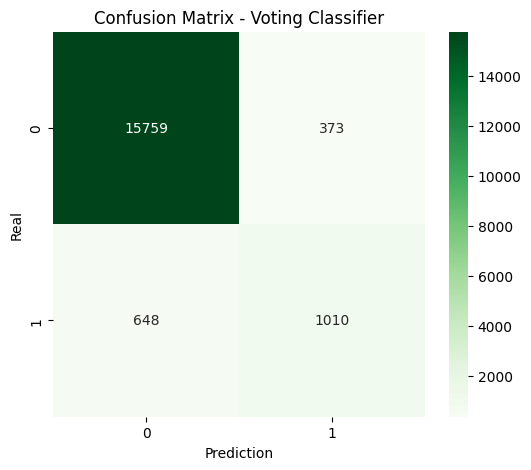


🔹 Reporte de clasificación - Voting Classifier:

              precision    recall  f1-score   support

           0       0.96      0.98      0.97     16132
           1       0.73      0.61      0.66      1658

    accuracy                           0.94     17790
   macro avg       0.85      0.79      0.82     17790
weighted avg       0.94      0.94      0.94     17790



In [137]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report


# Use the best estimators found from the previous GridSearchCV step
clf1 = models["Regresión Logística"]
clf2 = models["Árbol de Decisión"]
clf3 = models["Random Forest"]
clf4 = models["SVM (RBF)"]

# Create a Voting Classifier
# Changed voting to 'hard' because SVM does not have predict_proba by default
voting_clf = VotingClassifier(estimators=[('lr', clf1), ('dt', clf2), ('rf', clf3), ('svm', clf4)], voting='hard')


# Train the voting classifier
print("Training Voting Classifier...")
voting_clf.fit(X_train, y_train)
print("Voting Classifier training complete.")

# Evaluate the voting classifier
print("\nEvaluating Voting Classifier on the test set...")
y_pred_voting = voting_clf.predict(X_test)

# Calculate metrics
acc_voting = accuracy_score(y_test, y_pred_voting)
f1_voting = f1_score(y_test, y_pred_voting, average='weighted')
cm_voting = confusion_matrix(y_test, y_pred_voting)

print(f'Accuracy with Voting: {acc_voting:.4f}')
print(f'Weighted F1-score with Voting: {f1_voting:.4f}')

# Matriz de confusión visual for Voting Classifier
plt.figure(figsize=(6,5))
sns.heatmap(cm_voting, annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix - Voting Classifier')
plt.xlabel('Prediction')
plt.ylabel('Real')
plt.show()

# Detailed classification report for Voting Classifier
print("\n🔹 Reporte de clasificación - Voting Classifier:\n")
print(classification_report(y_test, y_pred_voting))

**Resultados del ensamble:**

Accuracy: 0.9426

F1 ponderado: 0.9403

En conjunto, los resultados indican que los factores que determinan si un campo es orgánico no se comportan de forma lineal ni independiente, sino que dependen de interacciones complejas entre variables.
Por ello, los modelos basados en árboles y ensembles (Random Forest) fueron los más apropiados para este tipo de datos.
El modelo seleccionado final (Random Forest) ofrece alta precisión, robustez ante ruido y buena capacidad de generalización, por lo que es el más adecuado para predecir si un campo es orgánico según sus características agronómicas y de manejo.

El objetivo del ensamble fue aprovechar las fortalezas de cada modelo y compensar sus debilidades individuales.

Los modelos lineales (Regresión Logística) tienden a generalizar bien pero pierden precisión en relaciones no lineales.

Los modelos de árboles (Decision Tree, Random Forest) capturan relaciones complejas pero pueden ser sensibles al ruido.

El SVM es preciso en fronteras complejas, pero su rendimiento puede disminuir ante clases desbalanceadas.

Al combinarlos, se buscó reducir la varianza y el sesgo simultáneamente, obteniendo un clasificador más estable y robusto.
El resultado fue un accuracy del 94.2% y un F1-score ponderado de 0.94, lo que confirma que el ensamble logró un equilibrio entre precisión y generalización, aunque no superó al Random Forest individual.